# <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#37FABC; font-size:160%; text-align:center;padding: 0px; border-bottom: 5px solid #407A68">PlayGround Series S4 E4 EDA and simple model</p>

## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 5px solid #008F77">Intro</p>

**🟦EN**:
<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em; color:#5361fc;">
This Kaggle workbook aims to provide a comprehensive exploratory data analysis (EDA) and a set of simple models (which will not be optimized), but which can give a vague idea of how to choose the best model for the given data set, with the ultimate goal of making decisions.
Through this EDA, we will be able to get a deeper understanding of the structure of the data, the values that have a relationship between them and the missing values and pattern or outliers that may affect when performing the modeling or selecting the model we want to use for prediction/recommendation. By performing an EDA, we can identify potential pitfalls and make the decisions and subsequent processing necessary to improve the performance and accuracy of the models.
</div>

**🟥ES**: 
<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em; background-color: #c9b1fa; color:#38196e;">
Este cuaderno Kaggle tiene el objetivo proporcionar un análisis exploratorio de datos (AED) exhaustivo y un conjunto de modelos simples (los cuales no estarán optimizados), pero que pueden llegar a dar una vaga idea para escoger el mejor modelo, para el conjunto de datos dado, con el objetivo final de tomar decisiones.

A través de este AED, podremos obtener una comprensión más profunda de la estructura de los datos, los valores que tiene una relación entre ellos y los valores que faltan y patrón o valores anómalos que pueda afectar a la hora de realizar el modelado o seleccionar el modelo que queremos utilizar para la predicción / recomendación. Al realizar un EDA, podemos identificar posibles obstáculos y tomar las decisiones, y posteriormente el procesado necesario para mejorar el rendimiento y la precisión de los modelos.
</div>

## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 3px solid #008F77">Data information</p>

**🟦EN**:

# Dataset Description

## Overview
The dataset for this competition (both train and test) was generated from a deep learning model trained on the Abalone dataset. Feature distributions are close to, but not exactly the same, as the original. Feel free to use the original dataset as part of this competition, both to explore differences as well as to see whether incorporating the original in training improves model performance.

## Files
- `train.csv` - the training dataset; Rings is the integer target
- `test.csv` - the test dataset; your objective is to predict the value of Rings for each row
- `sample_submission.csv` - a sample submission file in the correct format

## Variable Information
| Sex           | Feature         | Categorical/Continuous | Description                                      | Units    | Has Nulls |
|---------------|-----------------|------------------------|--------------------------------------------------|----------|-----------|
| Sex           | Feature         | Categorical            | M, F, and I (infant)                             | -        | No        |
| Length        | Feature         | Continuous             | Longest shell measurement                        | mm       | No        |
| Diameter      | Feature         | Continuous             | Perpendicular to length                          | mm       | No        |
| Height        | Feature         | Continuous             | With meat in shell                               | mm       | No        |
| Whole_weight  | Feature         | Continuous             | Whole abalone                                    | grams    | No        |
| Shucked_weight| Feature         | Continuous             | Weight of meat                                   | grams    | No        |
| Viscera_weight| Feature         | Continuous             | Gut weight (after bleeding)                      | grams    | No        |
| Shell_weight  | Feature         | Continuous             | After being dried                                | grams    | No        |
| Rings         | Target          | Integer                | +1.5 gives the age in years                      | -        | No        |



**🟥ES**:

# Descripción del Conjunto de Datos

## Visión General
El conjunto de datos para esta competición (tanto de entrenamiento como de prueba) se generó a partir de un modelo de aprendizaje profundo entrenado en el conjunto de datos Abalone. Las distribuciones de las características son similares, aunque no exactamente iguales, a las del original. Siéntete libre de utilizar el conjunto de datos original como parte de esta competición, tanto para explorar las diferencias como para ver si la incorporación del original en el entrenamiento mejora el rendimiento del modelo.


## Archivos
- `train.csv` - el conjunto de datos de entrenamiento; Rings es el objetivo entero
- `test.csv` - el conjunto de datos de prueba; su objetivo es predecir el valor de Rings para cada fila
- `sample_submission.csv` - un archivo de envío de muestra en el formato correcto

## Información de las Variables
| Sexo          | Característica  | Categórico/Continuo | Descripción                                      | Unidades | Tiene Nulos |
|---------------|-----------------|---------------------|--------------------------------------------------|----------|-------------|
| Sex           | Feature         | Categórico          | M, F, y I (infante)                              | -        | No          |
| Length        | Feature         | Continuo             | Medida más larga de la concha                   | mm       | No          |
| Diámetro      | Feature         | Continuo             | Perpendicular a la longitud                      | mm       | No          |
| Altura        | Feature         | Continuo             | Con carne en la concha                           | mm       | No          |
| Peso entero   | Feature         | Continuo             | Abulón completo                                  | gramos   | No          |
| Peso desh.    | Feature         | Continuo             | Peso de la carne                                 | gramos   | No          |
| Peso víscera  | Feature         | Continuo             | Peso de las vísceras (después del sangrado)      | gramos   | No          |
| Peso concha   | Feature         | Continuo             | Después de estar seca                            | gramos   | No          |
| Anillos       | Target          | Entero               | +1.5 años de edad                                | -        | No          |


## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 3px solid #008F77">Library import</p>

In [1]:
import os 
import sys
import math
import time
import optuna
import random
import warnings
import numpy as np 
import pandas as pd
import xgboost as xgb
import seaborn as sns
import lightgbm as lgb
import missingno as msno
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import matplotlib.colors as mcolors

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.pipeline import Pipeline
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [2]:
# Put theme of notebook 
from colorama import Fore, Style

# Colors
red = Fore.RED + Style.BRIGHT
mgta = Fore.MAGENTA + Style.BRIGHT
yllw = Fore.YELLOW + Style.BRIGHT
cyn = Fore.CYAN + Style.BRIGHT
blue = Fore.BLUE + Style.BRIGHT

# Reset
res = Style.RESET_ALL
plt.style.use({"figure.facecolor": "#282a36"})

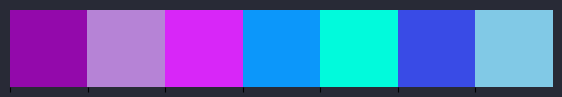

In [3]:
# Colors
YELLOW = "#F7C53E"

CYAN_G = "#0CF7AF"
CYAB_DARK = "#11AB7C"

PURPLE = "#D826F8"
PURPLE_DARJ = "#9309AB"
PURPLE_L = "#b683d6"

BLUE = "#0C97FA"
RED = "#FA1D19"
ORANGE = "#FA9F19"
GREEN = "#0CFA58"
LIGTH_BLUE = "#01FADC"
S_BLUE = "#81c9e6"
DARK_BLUE = "#394be6"
# Palettes
PALETTE_2 = [CYAN_G, PURPLE]
PALETTE_3 = [YELLOW, CYAN_G, PURPLE]
PALETTE_4 = [YELLOW, ORANGE, PURPLE, LIGTH_BLUE]
PALETTE_5 = [PURPLE_DARJ, PURPLE_L, PURPLE, BLUE, LIGTH_BLUE]
PALETTE_6 = [BLUE, RED, ORANGE, GREEN, LIGTH_BLUE, PURPLE]

# Vaporwave palette by Francesc Oliveras
PALETTE_7 = [PURPLE_DARJ, PURPLE_L, PURPLE, BLUE, LIGTH_BLUE, DARK_BLUE, S_BLUE]
PALETTE_7_C = [PURPLE_DARJ, BLUE, PURPLE, LIGTH_BLUE, PURPLE_L, S_BLUE, DARK_BLUE]
sns.palplot(sns.color_palette(PALETTE_7))

# Set Style
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)

cmap = mcolors.LinearSegmentedColormap.from_list("", PALETTE_2)
cmap_2 = mcolors.LinearSegmentedColormap.from_list("", [S_BLUE, PURPLE_DARJ])

font_family = dict(layout=go.Layout(font=dict(family="Franklin Gothic", size=10), width=1000, height=500))

warnings.filterwarnings('ignore')

## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 3px solid #008F77">Constants</p>

In [4]:
PATH = "/kaggle/input/playground-series-s4e4"
SUBMISSION_FILENAME = "sample_submission.csv"
TEST_FILENAME = "test.csv"
TRAIN_FILENAME = "train.csv"

TARGET = "Rings"

SUBMISSION_DIR = os.path.join(PATH, SUBMISSION_FILENAME)
TRAIN_DIR = os.path.join(PATH, TRAIN_FILENAME) 
TEST_DIR = os.path.join(PATH, TEST_FILENAME)

ORIGINAL_PATH = "/kaggle/input/abalone-dataset/abalone.csv"

SEED = 42
METRIC = 'rmse'
LOSS_FUN = "RMSE"
N_SPLITS = 5

## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 3px solid #008F77">Functions</p>

In [5]:
def show_corr_heatmap(df, title):
    
    corr = df.corr()
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True

    plt.figure(figsize = (15, 10))
    plt.title(title)
    # sns.heatmap(corr, annot = False, linewidths=.5, fmt=".2f", square=True, mask = mask, cmap=cmap_2)
    if df.shape[1] < 25:
        sns.heatmap(corr, annot=True, linewidths=.5, fmt=".2f", square=True, mask=mask, cmap=cmap_2)
    else:
        sns.heatmap(corr, annot=False, linewidths=.5, square=True, mask=mask, cmap=cmap_2)

    plt.show()

In [6]:
def data_description(df):
    print("Data description")
    print(f"Total number of records {df.shape[0]}")
    print(f'number of features {df.shape[1]}\n\n')
    columns = df.columns
    data_type = []
    
    # Get the datatype of features
    for col in df.columns:
        data_type.append(df[col].dtype)
        
    n_uni = df.nunique()
    # Number of NaN values
    n_miss = df.isna().sum()
    
    names = list(zip(columns, data_type, n_uni, n_miss))
    variable_desc = pd.DataFrame(names, columns=["Name","Type","Unique levels","Missing"])
    print(variable_desc)

In [7]:
def plot_cont(col, ax, color=PALETTE_7[0]):
    sns.histplot(data=comb_df, x=col,
                hue="set",ax=ax, hue_order=labels,
                common_norm=False, **histplot_hyperparams)
    
    ax_2 = ax.twinx()
    ax_2 = plot_cont_dot(
        comb_df.query('set=="train"'),
        col, TARGET, ax_2,
        color=color
    )
    
    ax_2 = plot_cont_dot(
        comb_df, col,
        TARGET, ax_2,
        color=color
    )

In [8]:
def show_pie_mult(dataframe, target = TARGET):
    target_counts = dataframe[target].sum()

    # Creando el gráfico de pastel con un agujero en el centro
    fig, ax = plt.subplots(figsize=(10, 8))
    wedges, texts, autotexts = ax.pie(target_counts, labels=target, autopct='%1.1f%%', startangle=140, colors=PALETTE_7_C)

    # Agregando un círculo blanco en el centro para hacer un agujero
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

    # Ajustando el aspecto para que sea un círculo y mostrando el gráfico
    plt.title('Distribución de los Targets')
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

In [9]:
def show_box_plot(dataframe):
    # numerical_features_for_boxplot = train_df.select_dtypes(include=['int64', 'float64']).columns.drop('id')
    numerical_features_for_boxplot = dataframe.select_dtypes(include=['int64', 'float64'])

    plt.figure(figsize=(20, 15))

    for i, feature in enumerate(numerical_features_for_boxplot, 1):
        plt.subplot(7, 5, i)
        sns.boxplot(y=train_df[feature], color=PALETTE_7_C[i % len(PALETTE_7_C)])
        plt.title(feature)

    plt.tight_layout()
    plt.show()


In [10]:
def show_hist(dataframe):
    # Filtrando las columnas numéricas para sus histogramas
    numerical_features = train_df.select_dtypes(include=['int64', 'float64']).columns

    # Configurando el tamaño de la figura
    plt.figure(figsize=(20, 15))

    # Creando un histograma para cada característica numérica
    for i, feature in enumerate(numerical_features, 1):
        plt.subplot(7, 5, i) # Ajustar según el número de características numéricas
        dataframe[feature].hist(bins=20, color=PALETTE_7_C[int(i%7)])
        plt.title(feature)

    plt.tight_layout()
    plt.show()

In [11]:
def model_cross_val(X, y, model, cv=5):
        sf = StratifiedKFold(n_splits = cv, shuffle = True, random_state = SEED)
        scores = []
        for j, (train_index, valid_index) in enumerate(sf.split(X, y)):
            X_train, y_train = X.iloc[train_index], y_log.iloc[train_index]
            X_valid, y_valid = X.iloc[valid_index], y_log.iloc[valid_index]
            model.fit(X_train, y_train)
            y_pred = model.predict(X_valid)
            scores = mean_squared_error(y_valid, y_pred, squared = False)
        return np.mean(scores)

In [12]:
def create_lgbm(trial):
    params = {
        "objective": "regression",
        "metric": METRIC,
        "verbosity": -1,
        "boosting_type": "gbdt",
        "bagging_freq": 1,
        "random_state": SEED,
        "n_jobs": -1,
        "n_estimators": trial.suggest_int("n_estimators", 400, 600),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.05),
        "subsample": trial.suggest_float("subsample", 0.05, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.3, 0.9),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 1, 100),
        "lambda_l1": trial.suggest_float("lambda_l1", 0.005, 0.015),
        "lambda_l2": trial.suggest_float("lambda_l2", 0.02, 0.06),
        "max_depth": trial.suggest_int("max_depth", 6, 16),
        "min_child_samples": trial.suggest_int("min_child_samples", 10, 60),
    }
    
    return LGBMRegressor(**params)

In [13]:
def create_xgboost(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 1000),
        "max_depth": trial.suggest_int("max_depth", 2, 20),
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.1, log=True),
        "subsample": trial.suggest_float("subsample", 0.05, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.05, 1.0),
        "min_child_weight": trial.suggest_int("min_child_weight", 2, 20),
        "gamma": trial.suggest_float("gamma", 1e-2, 1.0),
        "objective": "reg:squarederror",
        "eval_metric":  METRIC,
        "random_state": SEED,
    }
    
    return XGBRegressor(**params)

In [14]:
def create_random_forest(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 1000),
        "max_depth": trial.suggest_int("max_depth", 2, 20),
        "max_features": trial.suggest_categorical("max_features", ["sqrt", "log2"]),
        "criterion": trial.suggest_categorical("criterion", ["gini", "entropy", "log_loss"]),
        "random_state": SEED,
        "n_jobs": -1,
    }
    
    return RandomForestRegressor(**params)

In [15]:
def objective_cat(trial, X, y):
    params = {
        "iterations": 1000,
        "loss_function": LOSS_FUN,
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.1, log=True),
        "depth": trial.suggest_int("depth", 1, 10),
        "subsample": trial.suggest_float("subsample", 0.05, 1.0),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.05, 1.0),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 1, 100),
    }

    model = CatBoostRegressor(**params, silent=True)
    scores = model_cross_val(X, y, model, cv=5)
    return np.mean(scores)

In [16]:
def objective_xgb(trial, X, y):
    model = create_xgboost(trial)
    scores = model_cross_val(X, y, model, cv=5)
    return np.mean(scores)

In [17]:
def objective_lgb(trial, X, y):
    model = create_lgbm(trial)
    scores = model_cross_val(X, y, model, cv=5)
    return np.mean(scores)

## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 3px solid #008F77">Import data</p>

In [18]:
train_df = pd.read_csv(TRAIN_DIR)
test_df = pd.read_csv(TEST_DIR)
submission_df = pd.read_csv(SUBMISSION_DIR)
original_df = pd.read_csv(ORIGINAL_PATH)

In [19]:
train_df.head()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


In [20]:
train_df.isnull().sum()

id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Whole weight.1    0
Whole weight.2    0
Shell weight      0
Rings             0
dtype: int64

In [21]:
test_id = test_df["id"]

## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 3px solid #008F77">EDA and data modification</p>

In [22]:
data_description(train_df)
data_description(test_df)
data_description(original_df)

Data description
Total number of records 90615
number of features 10


             Name     Type  Unique levels  Missing
0              id    int64          90615        0
1             Sex   object              3        0
2          Length  float64            157        0
3        Diameter  float64            126        0
4          Height  float64             90        0
5    Whole weight  float64           3175        0
6  Whole weight.1  float64           1799        0
7  Whole weight.2  float64            979        0
8    Shell weight  float64           1129        0
9           Rings    int64             28        0
Data description
Total number of records 60411
number of features 9


             Name     Type  Unique levels  Missing
0              id    int64          60411        0
1             Sex   object              3        0
2          Length  float64            148        0
3        Diameter  float64            130        0
4          Height  float64             85  

In [23]:
train_df = train_df.drop(["id"], axis=1)
test_df = test_df.drop(["id"], axis=1)

<Axes: >

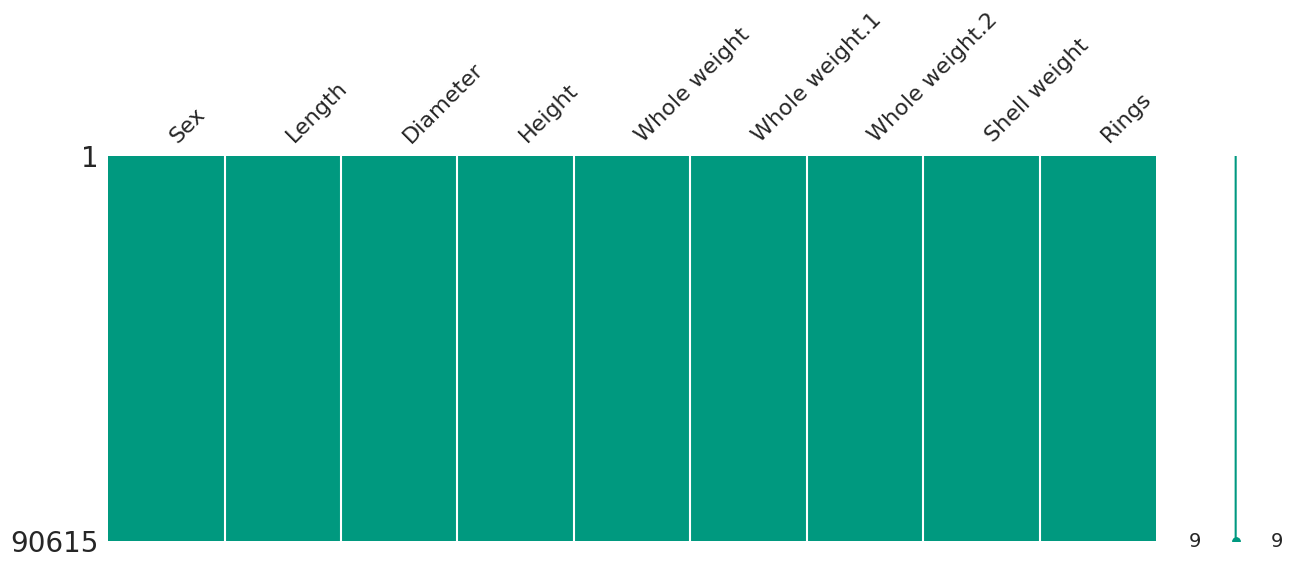

In [24]:
msno.matrix(df=train_df, figsize=(15,5), color=(0,0.6,0.5))

In [25]:
sex_encoded = pd.get_dummies(train_df["Sex"], prefix="Sex")
train_df_enc = pd.concat([train_df, sex_encoded], axis=1)
train_df_enc = train_df_enc.drop(columns=["Sex"])

test_df_enc = pd.concat([test_df, sex_encoded], axis=1)
test_df_enc = test_df_enc.drop(columns=["Sex"])

original_df_enc = pd.concat([original_df, sex_encoded], axis=1)
original_df_enc = original_df_enc.drop(columns=["Sex"])

In [26]:
test_df_enc.dropna(inplace=True)

In [27]:
train_df_enc.head()

,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings,Sex_F,Sex_I,Sex_M
0,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11,True,False,False
1,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11,True,False,False
2,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6,False,True,False
3,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10,False,False,True
4,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9,False,True,False


In [28]:
original_df_enc.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15.0,True,False,False
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7.0,True,False,False
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9.0,False,True,False
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10.0,False,False,True
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7.0,False,True,False


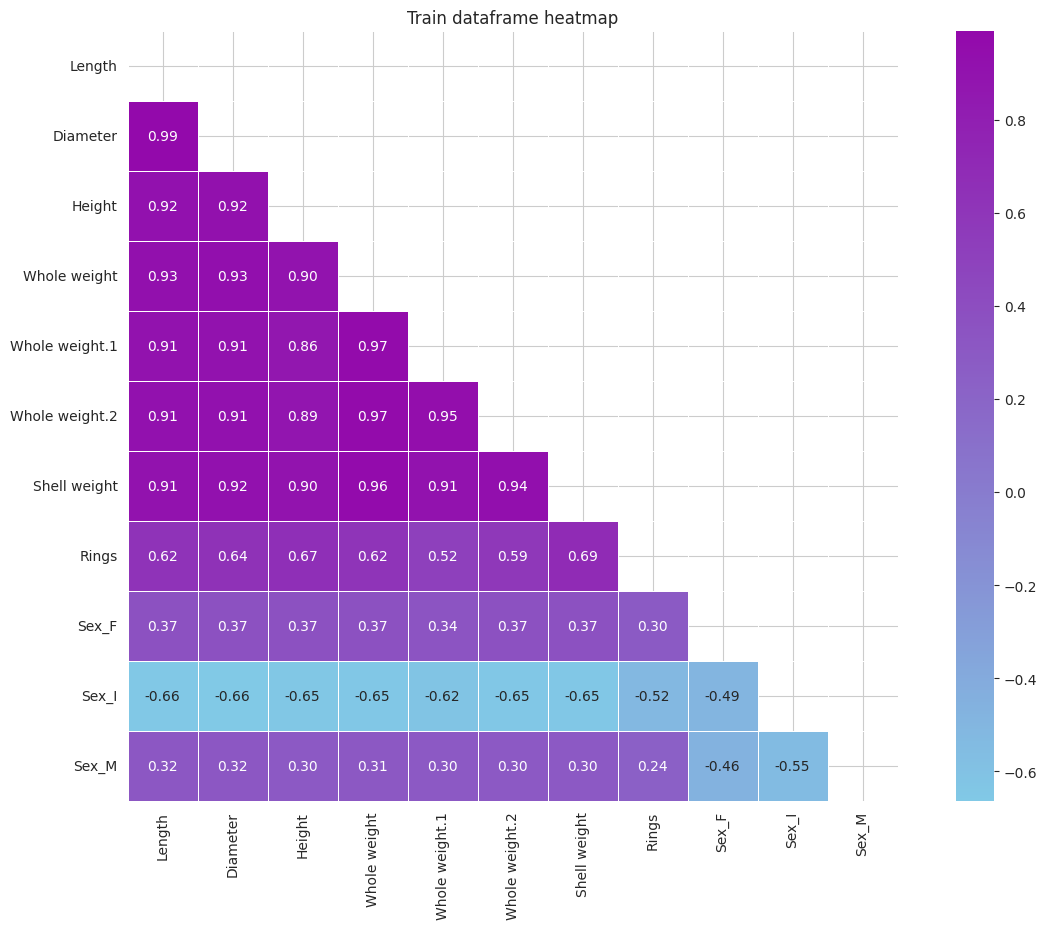

None

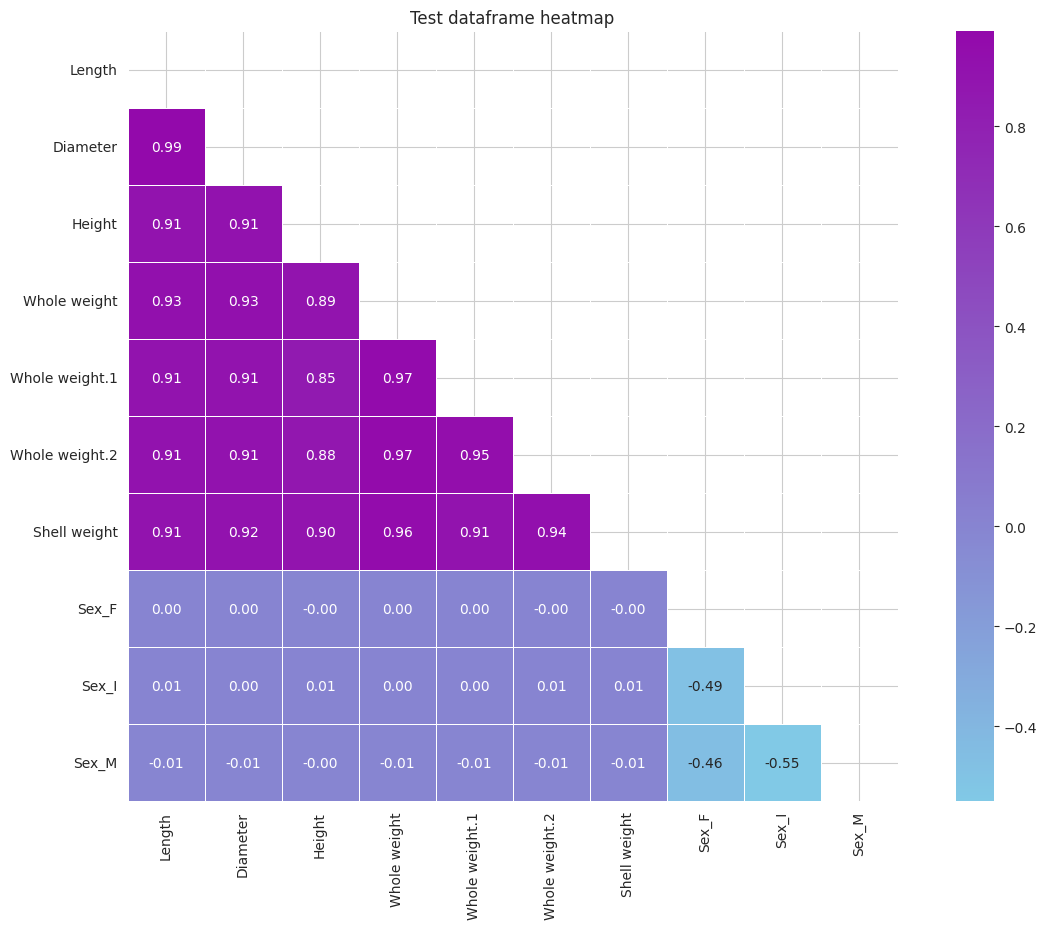

None

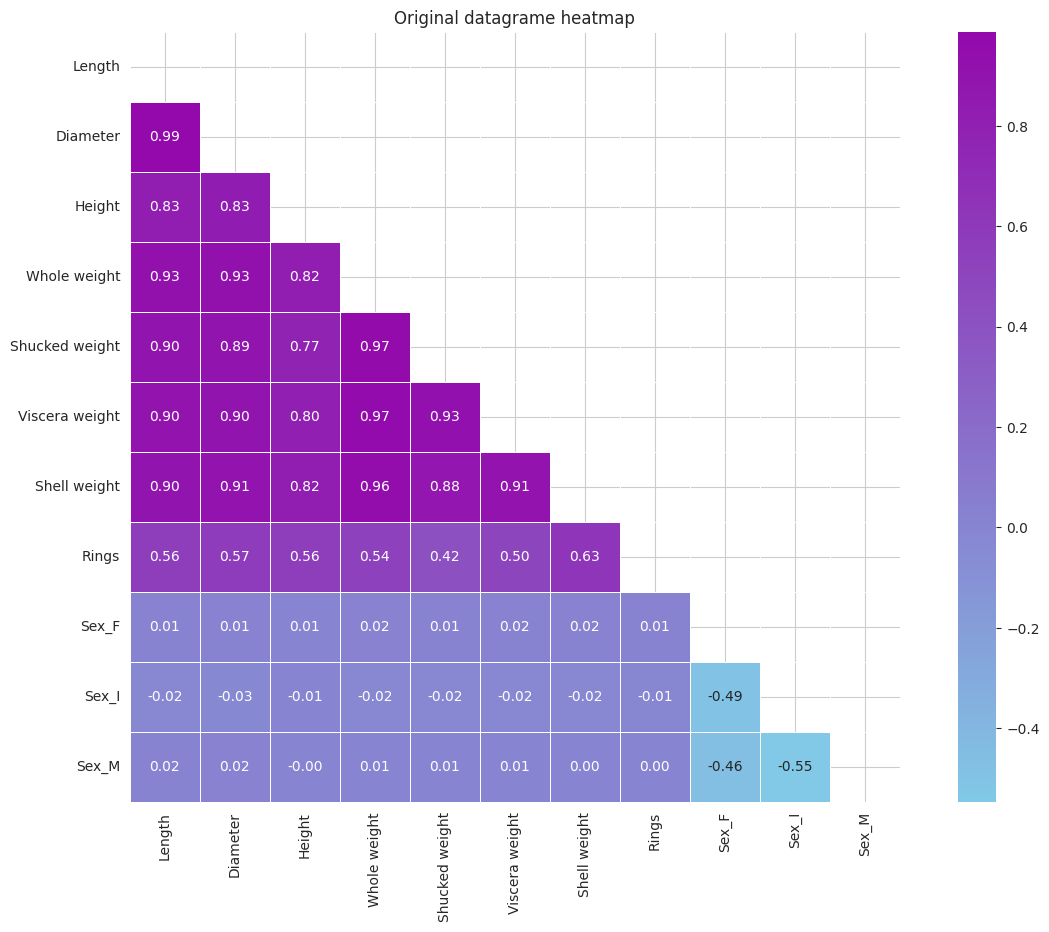

None

In [29]:
display(show_corr_heatmap(train_df_enc, "Train dataframe heatmap"))
display(show_corr_heatmap(test_df_enc, "Test dataframe heatmap"))
display(show_corr_heatmap(original_df_enc, "Original datagrame heatmap"))

In [30]:
train_df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1',
       'Whole weight.2', 'Shell weight', 'Rings'],
      dtype='object')

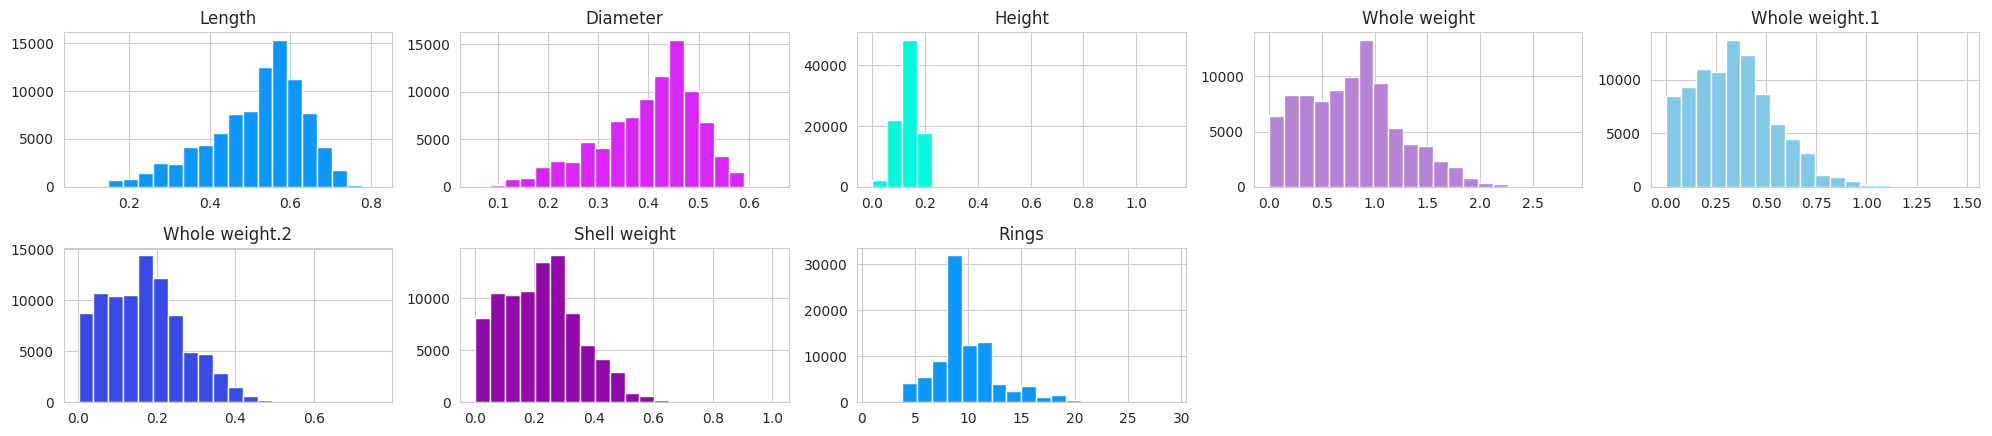

In [31]:
show_hist(train_df)

In [32]:
#show_pie_mult(train_df)

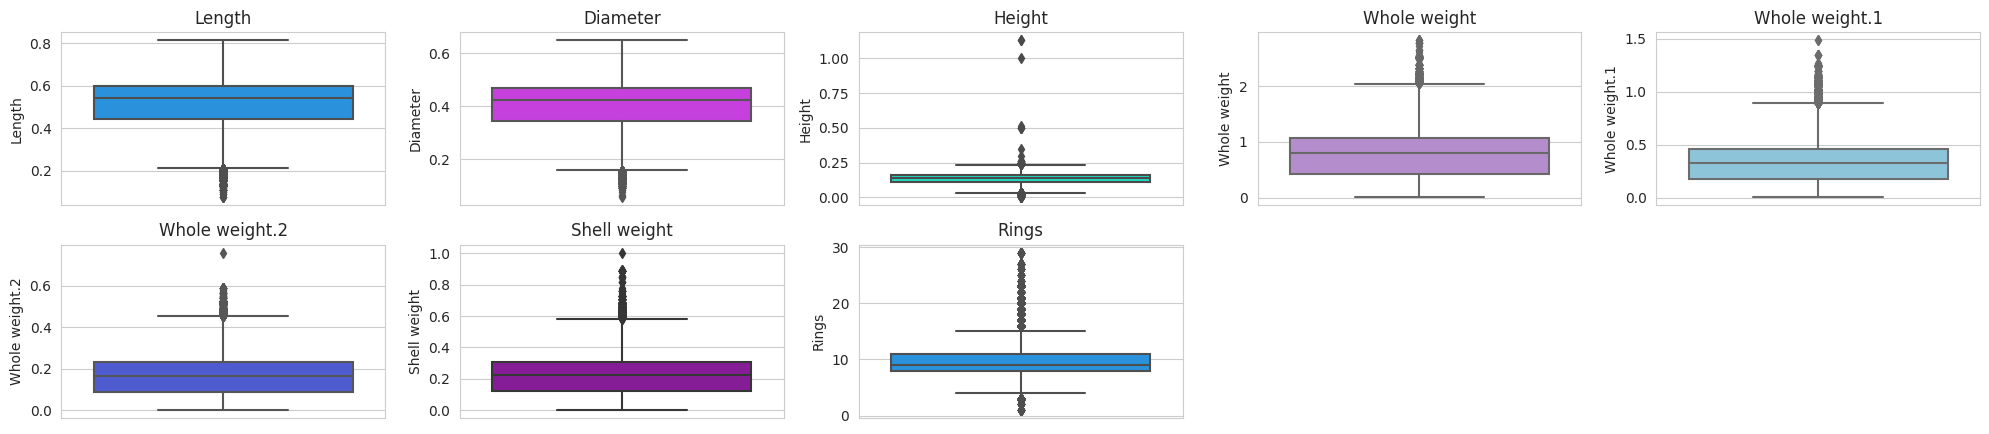

In [33]:
show_box_plot(train_df)

## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 3px solid #008F77">Model</p>

In [34]:
train_df_enc.columns = original_df_enc.columns
train_df_enc.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
0,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11,True,False,False
1,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11,True,False,False
2,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6,False,True,False
3,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10,False,False,True
4,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9,False,True,False


In [35]:
train = pd.concat([train_df_enc, original_df_enc], axis = 0, ignore_index=True)
train.dropna(inplace=True)

In [36]:
y = train[TARGET]
original_df_enc.head()
data_description(train)

Data description
Total number of records 94792
number of features 11


              Name     Type  Unique levels  Missing
0           Length  float64            157        0
1         Diameter  float64            126        0
2           Height  float64             90        0
3     Whole weight  float64           3205        0
4   Shucked weight  float64           1806        0
5   Viscera weight  float64            983        0
6     Shell weight  float64           1132        0
7            Rings  float64             28        0
8            Sex_F     bool              2        0
9            Sex_I     bool              2        0
10           Sex_M     bool              2        0


In [37]:
y

0        11.0
1        11.0
2         6.0
3        10.0
4         9.0
         ... 
94787    11.0
94788    10.0
94789     9.0
94790    10.0
94791    12.0
Name: Rings, Length: 94792, dtype: float64

In [38]:
y_log = np.log(1+y)

In [39]:
train = train.drop([TARGET], axis = 1)
test_df_enc.columns = train.columns

In [40]:
model = XGBRegressor(
    max_depth=11,
    gamma=0.0653, 
    subsample=0.5737,  
    n_estimators=854,
    min_child_weight=4,
    learning_rate=0.0307,
    colsample_bytree=0.4645,  
    objective='reg:squarederror',
    eval_metric=METRIC,
    random_state=SEED
)

print(f"Cross validation score: {blue}{model_cross_val(train, y, model, cv=5)}{res}")
# model_cross_val(train, y, model, cv=5)

Cross validation score: 0.14943521908217075


In [41]:
model = LGBMRegressor(
    max_depth=14,  
    n_estimators=582,
    subsample=0.9394,
    lambda_l1=0.0111,  
    lambda_l2=0.0563,
    min_data_in_leaf=87, 
    min_child_samples=25,  
    learning_rate=0.0428,
    colsample_bytree=0.7124,
    objective='regression',
    metric=METRIC,
    verbosity=-1,  
    boosting_type="gbdt",
    bagging_freq=1,  
    random_state=SEED,
    n_jobs=-1  
)

# model_cross_val(train, y, model, cv=5)
print(f"Cross validation score: {blue}{model_cross_val(train, y, model, cv=5)}{res}")

Cross validation score: 0.14917445378831432


In [42]:
model = CatBoostRegressor(
    learning_rate=0.0978,  
    depth=8, 
    subsample=0.8883,  
    colsample_bylevel=0.3397,  
    min_data_in_leaf=60,  
    iterations=1000,  
    loss_function=LOSS_FUN,  
    silent=True  
)

print(f"Cross validation score: {blue}{model_cross_val(train, y, model, cv=5)}{res}")
# model_cross_val(train, y, model, cv=5)

Cross validation score: 0.14956122121638776


In [43]:
skf = StratifiedKFold(n_splits=N_SPLITS)

scores = []

for train_index, validation_index in skf.split(train, y):
    X_train, X_valid = train.iloc[train_index, :], train.iloc[validation_index, :]
    y_train, y_valid = y_log.iloc[train_index], y_log.iloc[validation_index]

    cat = CatBoostRegressor(
        learning_rate=0.09717753156189449,
        depth=8,
        subsample=0.8835788878050225,
        colsample_bylevel=0.33957608566891955,
        min_data_in_leaf=60,
        iterations=1000,
        loss_function=LOSS_FUN,
        silent=True
    )
    
    xgb = XGBRegressor(
        n_estimators=854,
        max_depth=11,
        learning_rate=0.030716176254596645,
        subsample=0.5731027170642267,
        colsample_bytree=0.4641389544945836,
        min_child_weight=4,
        gamma=0.06558705435333196,
        objective='reg:squarederror',
        eval_metric=METRIC,
        random_state=SEED
    )
    
    lgbm = LGBMRegressor(
        n_estimators=582,
        learning_rate=0.04240212753928245,
        subsample=0.9506839415640654,
        colsample_bytree=0.7179882922388522,
        min_data_in_leaf=87,
        lambda_l1=0.011287423843123725,
        lambda_l2=0.056707291084203365,
        max_depth=14,
        min_child_samples=25,
        objective='regression',
        metric=METRIC,
        verbosity=-1,
        boosting_type="gbdt",
        bagging_freq=1,
        random_state=SEED,
        n_jobs=-1
    )

    # Fitting models
    cat.fit(X_train, y_train, verbose=False)
    lgbm.fit(X_train, y_train)
    xgb.fit(X_train, y_train)

    # Predicting on validation set
    y_pred_cat = cat.predict(X_valid)
    y_pred_lgbm = lgbm.predict(X_valid)
    y_pred_xgb = xgb.predict(X_valid)

    # Averaging predictions
    y_pred = (y_pred_cat + y_pred_lgbm + y_pred_xgb) / 3
    
    # Calculate RMSE
    rmse = mean_squared_error(y_valid, y_pred, squared=False)
    scores.append(rmse)

average_rmse = np.mean(scores)
print(f"Average RMSE: {red}{average_rmse}{res}")

Average RMSE: 0.14895269757008736


In [44]:
cat = CatBoostRegressor(
    learning_rate=0.097,
    depth=8,
    subsample=0.889,
    colsample_bylevel=0.34,
    min_data_in_leaf=60,
    iterations=1000,
    loss_function=LOSS_FUN, 
    verbose=False  # Use verbose instead of silent for clarity
)

xgb = XGBRegressor(
    n_estimators=854,
    max_depth=11,
    learning_rate=0.031,
    subsample=0.573,
    colsample_bytree=0.465,
    min_child_weight=4,
    gamma=0.065,
    objective='reg:squarederror',
    eval_metric=METRIC,  
    random_state=SEED  
)

lgbm = LGBMRegressor(
    n_estimators=582,
    learning_rate=0.042,
    subsample=0.94,
    colsample_bytree=0.712,
    min_data_in_leaf=87,
    lambda_l1=0.012,
    lambda_l2=0.056,
    max_depth=14,
    min_child_samples=25,
    objective='regression',
    metric=METRIC,  
    boosting_type='gbdt',
    bagging_freq=1,
    random_state=SEED,
    n_jobs=-1,
    silent=True  # For consistency, though consider if silence is always desired
)

In [45]:
cat.fit(train, y_log, silent=True)  
lgbm.fit(train, y_log)
xgb.fit(train, y_log)

[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] min_data_in_leaf is set=87, min_child_samples=25 will be ignored. Current value: min_data_in_leaf=87
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=0.056, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.056
[LightGBM] [Warning] lambda_l1 is set=0.012, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.012
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] min_data_in_leaf is set=87, min_child_samples=25 will be ignored. Current value: min_data_in_leaf=87
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] 

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.465, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=0.065, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.031, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=11, max_leaves=None,
             min_child_weight=4, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=854, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 3px solid #008F77">Submission</p>

In [46]:
cat_pred = cat.predict(test_df_enc)
xgb_pred = xgb.predict(test_df_enc)
lgbm_pred = lgbm.predict(test_df_enc)

[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] min_data_in_leaf is set=87, min_child_samples=25 will be ignored. Current value: min_data_in_leaf=87
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=0.056, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.056
[LightGBM] [Warning] lambda_l1 is set=0.012, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.012
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


In [47]:
pred = (cat_pred + xgb_pred + lgbm_pred) / 3

submission_df = pd.DataFrame({
    'id': test_id, 
    TARGET: np.exp(pred) - 1  
})

In [48]:
submission_df.to_csv('submission.csv', index=False)

## Thanks for your support, the notebook is still in process, the model will be uploaded soon.